# Problem 1.
## (a) Using OnlineAd X train.csv and OnlineAd Y train.csv, train multiple models that you learned in class. Report the training results. What metric did you use? How do different models perform on the training data?
### -데이터 불러오기

In [1]:
my_list = []
for i in range(1,252):
    my_list.append(i)

import pandas as pd
X_train = pd.read_csv("OnlineAd_X_train.csv", names=my_list)
Y_train = pd.read_csv("OnlineAd_Y_train.csv", names=['no_click','click_A','click_B'])

In [2]:
X_train

,1,2,3,4,5,6,7,8,9,10,...,242,243,244,245,246,247,248,249,250,251
0,0.9687,-0.3948,-0.5467,-0.1611,0.3003,-0.3423,-0.2714,-0.3337,0.4581,0.0075,...,-1.6922,0.1422,0.9220,-0.0883,0.7012,0.6710,-0.3856,0.5162,-0.3330,0.0466
1,-0.4669,0.5222,0.6956,-0.6545,0.4683,-1.3767,-0.8648,-0.1455,1.0665,-0.3412,...,-1.5445,0.4600,-0.3467,0.6233,0.0138,-0.4127,-0.2212,-0.0751,-1.6022,0.4181
2,-1.1187,0.2340,-0.0558,-0.3746,0.2157,-0.7238,0.1127,-0.3854,-0.4403,-0.3354,...,-0.9666,0.2869,0.1066,0.4575,-0.0295,1.5963,0.1855,0.2426,-1.4561,0.0030
3,0.6143,0.1321,0.3065,0.4454,-1.3510,0.4344,0.9074,-0.4787,0.5226,1.1743,...,-0.1865,0.5274,0.1729,-0.6284,-0.7961,0.5320,0.0886,0.0994,-0.2155,0.3327
4,0.9119,1.1340,0.4638,0.3419,0.8532,0.7698,0.8161,0.9577,0.3371,0.6994,...,0.6064,0.0781,0.6539,1.1777,0.8706,0.7935,0.4019,0.8801,0.5517,0.9278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,-1.6151,-0.0366,0.1771,0.0683,0.6009,-1.0059,-0.7811,-0.7509,0.0830,0.3929,...,-1.5599,0.7104,-0.0008,-1.3282,0.0066,-0.3460,-0.8685,-0.3795,-0.4775,0.8624
1448,-0.5898,-0.0035,0.4417,0.0339,-0.3701,0.3677,-0.9483,-0.3817,-0.1512,-0.6579,...,0.4926,-0.7128,-1.2481,0.8069,0.1385,0.1297,0.0364,-1.0587,0.3042,-0.5655
1449,-1.1236,-0.0516,-0.8155,0.3472,0.2073,0.1098,0.1199,-0.3269,0.4758,-0.2896,...,-1.1113,1.1282,0.8240,0.2552,0.0346,1.0114,1.6984,0.6347,-1.1608,-0.1943
1450,-1.3424,-0.9087,-0.7047,-1.2451,-1.1737,-1.7872,-1.6132,-1.7413,-0.6457,-1.3588,...,-0.6733,-1.4808,-1.7423,-1.4594,-1.3237,-1.4440,-1.1995,-0.9334,-0.5953,-1.7476


In [3]:
Y_train

,no_click,click_A,click_B
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
1447,1.0,0.0,0.0
1448,0.0,0.0,1.0
1449,1.0,0.0,0.0
1450,0.0,0.0,1.0


In [4]:
print("\t- no_click:\n", Y_train['no_click'].value_counts())
print("\t- click_A:\n", Y_train['click_A'].value_counts())
print("\t- click_B:\n", Y_train['click_B'].value_counts())

	- no_click:
 1.0    822
0.0    630
Name: no_click, dtype: int64
	- click_A:
 0.0    1175
1.0     277
Name: click_A, dtype: int64
	- click_B:
 0.0    1099
1.0     353
Name: click_B, dtype: int64


### -Y_train을 multi-class data로 만들어주기 (Y_train의 ['label'] 열 추가)

In [5]:
label = []
for i in range(len(Y_train)):
    if Y_train['no_click'][i] == 1.0:
        label.append("no_click")
    elif Y_train['click_A'][i] == 1.0:
        label.append("click_A")
    elif Y_train['click_B'][i] == 1.0:
        label.append("click_B")
Y_train['label'] = label
Y_train

,no_click,click_A,click_B,label
0,1.0,0.0,0.0,no_click
1,0.0,0.0,1.0,click_B
2,1.0,0.0,0.0,no_click
3,1.0,0.0,0.0,no_click
4,1.0,0.0,0.0,no_click
...,...,...,...,...
1447,1.0,0.0,0.0,no_click
1448,0.0,0.0,1.0,click_B
1449,1.0,0.0,0.0,no_click
1450,0.0,0.0,1.0,click_B


In [6]:
print(Y_train['label'].value_counts())

no_click    822
click_B     353
click_A     277
Name: label, dtype: int64


-출처: https://scikit-learn.org/stable/modules/multiclass.html

### 1) KNN classifier
- 출처: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier     
- CV 관련: https://www.analyticsvidhya.com/blog/2021/11/top-7-cross-validation-techniques-with-python-code/    
- https://scikit-learn.org/stable/modules/cross_validation.html      
- scoring: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
       
- 10-fold Cross Validation 사용

-**최적의 k 구하기**

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=10)

list_1 = []
for i in range(50): ## k값을 3부터 99까지 구함
    knn = KNeighborsClassifier(n_neighbors = 2*i+1)
    kf=KFold(n_splits=10)
    score=cross_val_score(knn, X_train, Y_train['label'], cv=kf)
    list_1.append(score.mean())
k = 2*(list_1.index(max(list_1)))+1
k

65

**k=65**

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,KFold
knn_65 = KNeighborsClassifier(n_neighbors = 65)
kf=KFold(n_splits=10)
score=cross_val_score(knn_65, X_train, Y_train['label'], cv=kf)
score2=cross_val_score(knn_65, X_train, Y_train['label'], cv=kf, scoring='roc_auc_ovr')
print("Cross Validation Scores(accuracy) are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))
print("\nROC_AUC Scores are {}".format(score2))
print("Average ROC_AUC Scores:{}".format(score2.mean()))

Cross Validation Scores(accuracy) are [0.52054795 0.5890411  0.6        0.64827586 0.62068966 0.46206897
 0.56551724 0.55862069 0.59310345 0.6137931 ]
Average Cross Validation score :0.5771658006613132

ROC_AUC Scores are [0.64643122 0.70273786 0.68404281 0.68654028 0.71062888 0.60517834
 0.70131538 0.64793097 0.70417095 0.69476924]
Average ROC_AUC Scores:0.6783745927071554


### 2) Decision Tree Classifier
- 출처: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,KFold
decision_tree = DecisionTreeClassifier(random_state = 0)
kf=KFold(n_splits=10)
score=cross_val_score(decision_tree, X_train, Y_train['label'], cv=kf)
score2=cross_val_score(decision_tree, X_train, Y_train['label'], cv=kf, scoring='roc_auc_ovr')
print("Cross Validation accuracy is {}".format(score))
print("Average Cross Validation accuracy :{}".format(score.mean()))
print("\nROC_AUC Scores are {}".format(score2))
print("Average ROC_AUC Scores:{}".format(score2.mean()))

Cross Validation accuracy is [0.49315068 0.57534247 0.48965517 0.48965517 0.59310345 0.51724138
 0.45517241 0.47586207 0.57931034 0.45517241]
Average Cross Validation accuracy :0.5123665564478035

ROC_AUC Scores are [0.55445492 0.65231414 0.55663393 0.55303665 0.64128352 0.58410216
 0.53155429 0.5418131  0.62354172 0.56090152]
Average ROC_AUC Scores:0.5799635946211459


- **feature importance**: The impurity-based feature importances. The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

In [10]:
decision_tree = DecisionTreeClassifier(random_state = 0)
decision_tree.fit(X_train, Y_train['label'])

list_1 = []
for i in range(len(decision_tree.feature_importances_)):
    list_1.append([i+1, decision_tree.feature_importances_[i]])
    
fi_dt = pd.DataFrame(list_1, columns=['feature_number', 'feature_importance'])
fi_dt

,feature_number,feature_importance
0,1,0.004619
1,2,0.004878
2,3,0.004570
3,4,0.002274
4,5,0.000000
...,...,...
246,247,0.006764
247,248,0.006200
248,249,0.004438
249,250,0.007692


### show the tree graph
- 출처: https://www.kaggle.com/code/kashnitsky/topic-3-decision-trees-and-knn/notebook    

In [11]:
import pydotplus  # pip install pydotplus
from sklearn.tree import export_graphviz


def tree_graph_to_png(tree, png_file_to_save):
    tree_str = export_graphviz(
        tree, filled=True, out_file=None
    )
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)
    
tree_graph_to_png(
    tree=decision_tree,
    png_file_to_save="decision_tree_train_data.png",
)

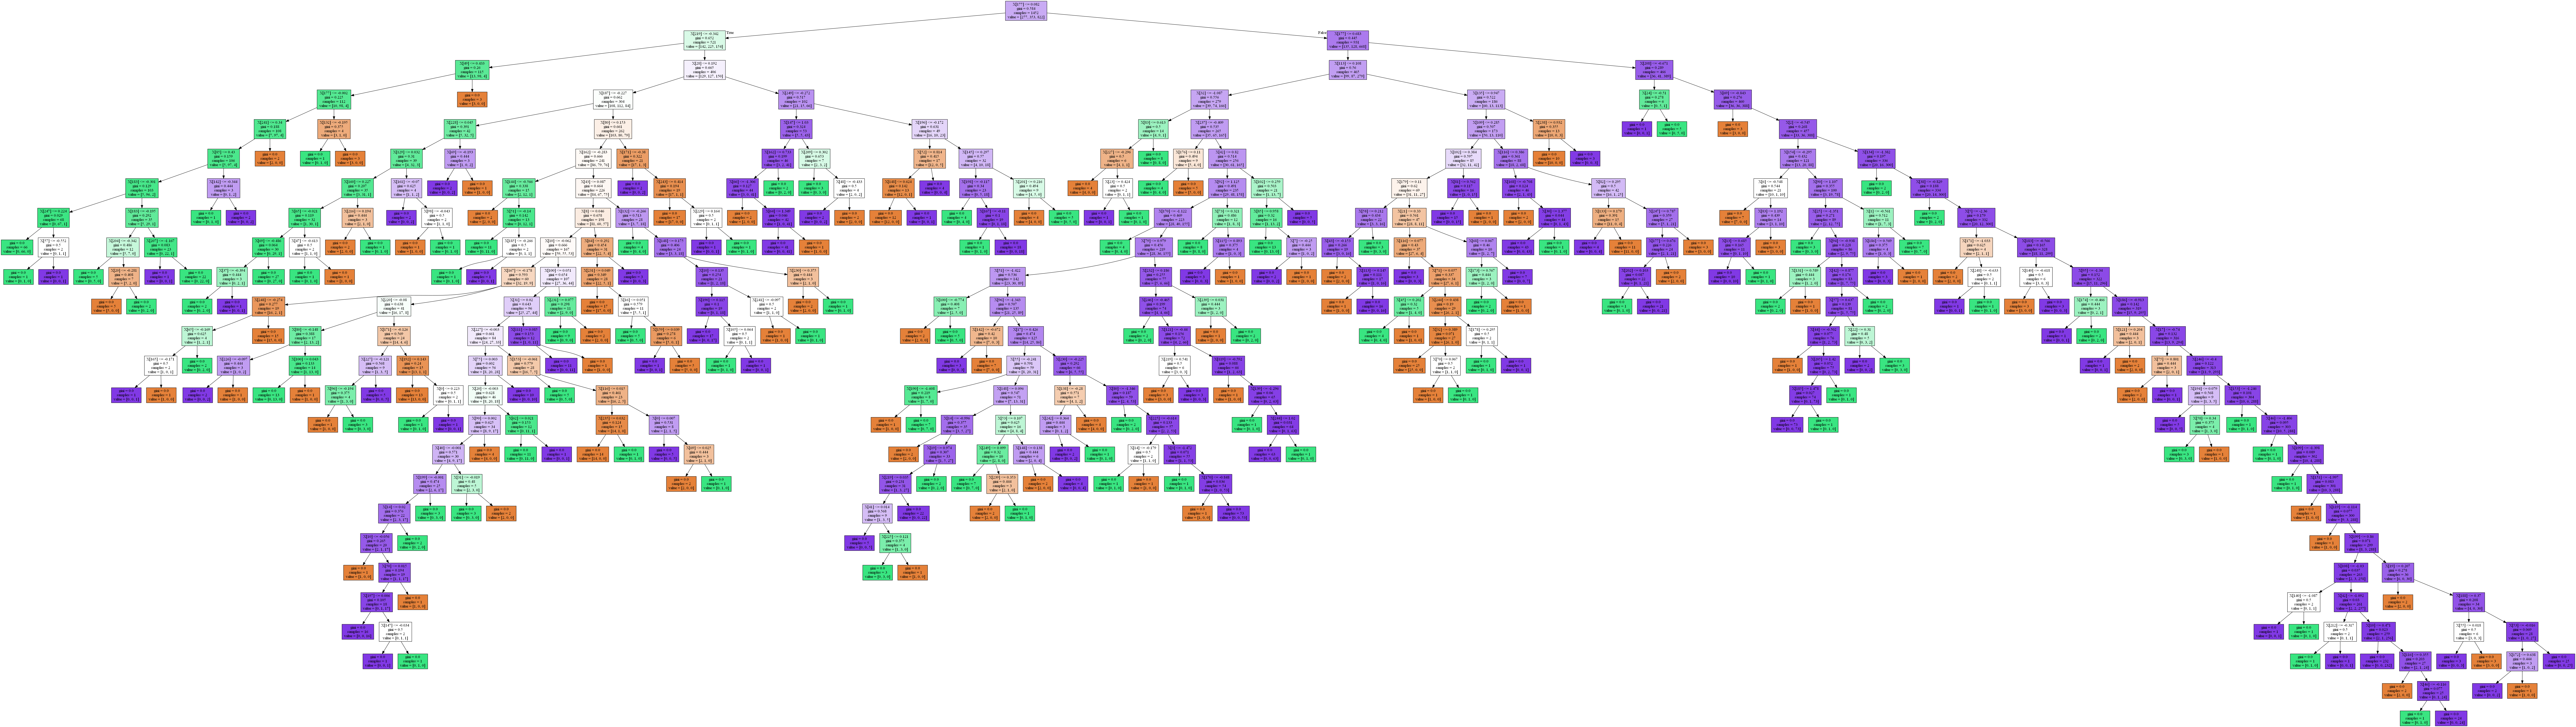

### 3) Random Forest Classifier
- 출처: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,KFold
random_forest = RandomForestClassifier(random_state = 0)
kf=KFold(n_splits=10)
score=cross_val_score(random_forest, X_train, Y_train['label'], cv=kf)
score2=cross_val_score(random_forest, X_train, Y_train['label'], cv=kf, scoring='roc_auc_ovr')
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))
print("\nROC_AUC Scores are {}".format(score2))
print("Average ROC_AUC Scores:{}".format(score2.mean()))

Cross Validation Scores are [0.63013699 0.59589041 0.64827586 0.69655172 0.67586207 0.62758621
 0.62758621 0.6137931  0.66896552 0.59310345]
Average Cross Validation score :0.6377751535191309

ROC_AUC Scores are [0.70206069 0.72509    0.7033001  0.7273097  0.72682983 0.70303455
 0.73176251 0.66261522 0.77797443 0.72092212]
Average ROC_AUC Scores:0.7180899139710193


In [13]:
random_forest = RandomForestClassifier(random_state = 0)
random_forest.fit(X_train, Y_train['label'])

list_1 = []
for i in range(len(random_forest.feature_importances_)):
    list_1.append([i+1, random_forest.feature_importances_[i]])
    
fi_rf = pd.DataFrame(list_1, columns=['feature_number', 'feature_importance'])
fi_rf.describe()

,feature_number,feature_importance
count,251.000000,251.000000
mean,126.000000,0.003984
std,72.601653,0.002058
min,1.000000,0.002192
25%,63.500000,0.003003
50%,126.000000,0.003377
75%,188.500000,0.004081
max,251.000000,0.020603


### 4) SVM
- 출처: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
- only linear SVC can handle multiclass problem(in this case, "ovr")   
- ROC_AUC Scores function not available in SVM

In [14]:
from sklearn import svm
from sklearn.model_selection import cross_val_score,KFold

svm =  svm.LinearSVC(random_state=0)
kf=KFold(n_splits=10)
score=cross_val_score(svm, X_train, Y_train['label'], cv=kf)
score2=cross_val_score(svm, X_train, Y_train['label'], cv=kf, scoring='roc_auc_ovr')
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))
## ROC_AUC Scores function not available in SVM
# print("\nROC_AUC Scores are {}".format(score2))
# print("Average ROC_AUC Scores:{}".format(score2.mean()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 88, in __call__
    *args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 277, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getat

Cross Validation Scores are [0.5890411  0.56849315 0.53793103 0.54482759 0.57931034 0.51034483
 0.55172414 0.51724138 0.6137931  0.52413793]
Average Cross Validation score :0.553684459140293


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 88, in __call__
    *args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 277, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getat

## (b) Do you think dimension reduction on features (or feature selection) is needed here? If so, provide analysis on which features may be important. If not, please justify your answer.
- seaborn: https://gibles-deepmind.tistory.com/54,     
- https://wikidocs.net/92089

### 1) decision tree

In [15]:
decision_tree = DecisionTreeClassifier(random_state = 0)
decision_tree.fit(X_train, Y_train['label'])

list_1 = []
for i in range(len(decision_tree.feature_importances_)):
    list_1.append([i+1, decision_tree.feature_importances_[i]])
    
fi_dt = pd.DataFrame(list_1, columns=['feature_number', 'dt_feature_importance'])
fi_dt.describe()

,feature_number,dt_feature_importance
count,251.000000,251.000000
mean,126.000000,0.003984
std,72.601653,0.010036
min,1.000000,0.000000
25%,63.500000,0.000000
50%,126.000000,0.002144
75%,188.500000,0.005519
max,251.000000,0.141738


In [16]:
fi_dt_ordered = fi_dt.sort_values(by='dt_feature_importance', ascending=False)
fi_dt_ordered.reset_index(inplace=True, drop=True)
fi_dt_ordered

,feature_number,dt_feature_importance
0,178,0.141738
1,220,0.052964
2,117,0.020645
3,29,0.018803
4,81,0.015235
...,...,...
246,123,0.000000
247,124,0.000000
248,125,0.000000
249,127,0.000000


In [17]:
fi_dt_ordered[fi_dt_ordered['dt_feature_importance']==0]

,feature_number,dt_feature_importance
152,218,0.0
153,183,0.0
154,216,0.0
155,182,0.0
156,194,0.0
...,...,...
246,123,0.0
247,124,0.0
248,125,0.0
249,127,0.0


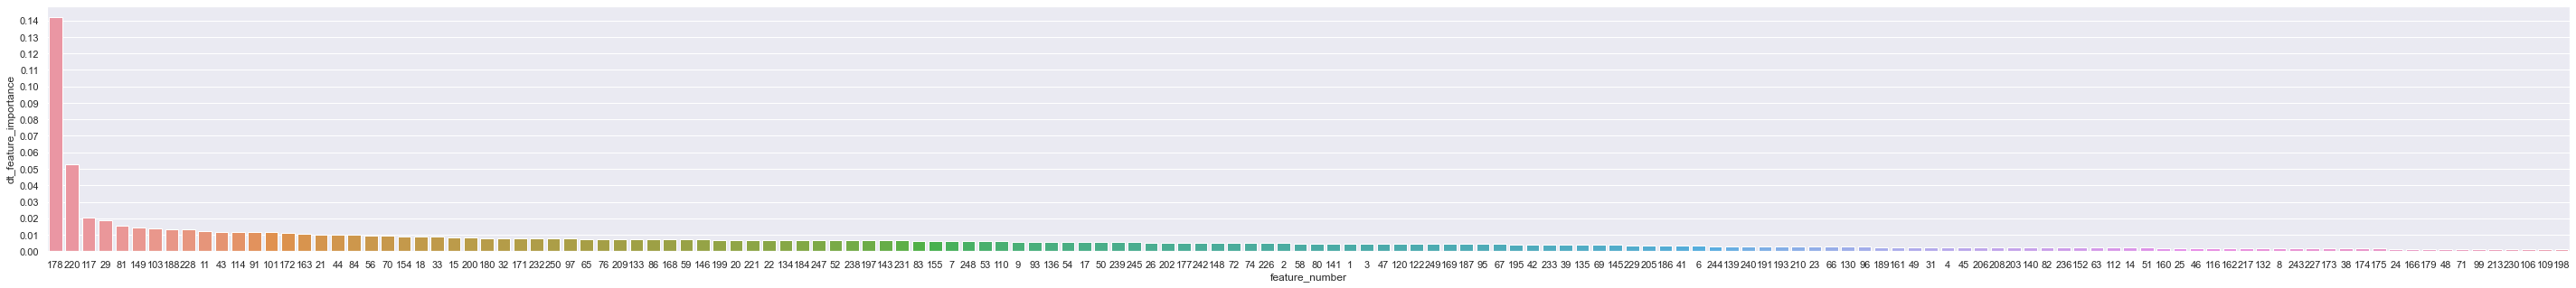

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# graph over Q1
sns.set(rc = {'figure.figsize':(50,5)})
sns.barplot(x='feature_number', y='dt_feature_importance', data=fi_dt_ordered[fi_dt_ordered['dt_feature_importance']>0], 
            order = fi_dt_ordered['feature_number'][fi_dt_ordered['dt_feature_importance']>0]) 
plt.rc('xtick', labelsize=7)
plt.yticks(np.arange(0, 0.14, 0.01))
plt.show()

### 2) random forest
- random forest feature_importances_ 활용 출처: https://hongl.tistory.com/130?category=933150
- Random Forests are often used for feature selection in a data science workflow. The reason is because the tree-based strategies used by random forests naturally ranks by how well they improve the purity of the node. This mean decrease in impurity over all trees (called gini impurity). Nodes with the greatest decrease in impurity happen at the start of the trees, while notes with the least decrease in impurity occur at the end of trees. Thus, by pruning trees below a particular node, we can create a subset of the most important features.     
(출처: https://chrisalbon.com/code/machine_learning/trees_and_forests/feature_selection_using_random_forest/)

#### hyperparameter tuning: max_depth
- 출처: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74,     
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [19]:
from sklearn.model_selection import GridSearchCV

# default of max_depth parameter is None.
max_depth = [int(x) for x in np.linspace(6, 40, num = 18)]
max_depth.append(None)

grid = {'max_depth' : max_depth}

classifier_grid = GridSearchCV(RandomForestClassifier(random_state=0), param_grid = grid, scoring="accuracy", cv=kf)
classifier_grid.fit(X_train, Y_train['label'])

print("최고 평균 정확도 : {}".format(classifier_grid.best_score_))
print("최고의 파라미터 :", classifier_grid.best_params_)

최고 평균 정확도 : 0.6426074633915919
최고의 파라미터 : {'max_depth': 12}


In [20]:
random_forest = RandomForestClassifier(random_state = 0, max_depth=12)
random_forest.fit(X_train, Y_train['label'])

list_1 = []
for i in range(len(random_forest.feature_importances_)):
    list_1.append([i+1, random_forest.feature_importances_[i]])
    
fi_rf = pd.DataFrame(list_1, columns=['feature_number', 'rf_feature_importance'])
fi_rf.describe()

,feature_number,rf_feature_importance
count,251.000000,251.000000
mean,126.000000,0.003984
std,72.601653,0.002284
min,1.000000,0.001925
25%,63.500000,0.002864
50%,126.000000,0.003390
75%,188.500000,0.004130
max,251.000000,0.022073


In [21]:
fi_rf_ordered = fi_rf.sort_values(by='rf_feature_importance', ascending=False)
fi_rf_ordered

,feature_number,rf_feature_importance
177,178,0.022073
239,240,0.015106
137,138,0.013506
208,209,0.012952
225,226,0.012772
...,...,...
18,19,0.002171
206,207,0.002118
33,34,0.002057
198,199,0.001967


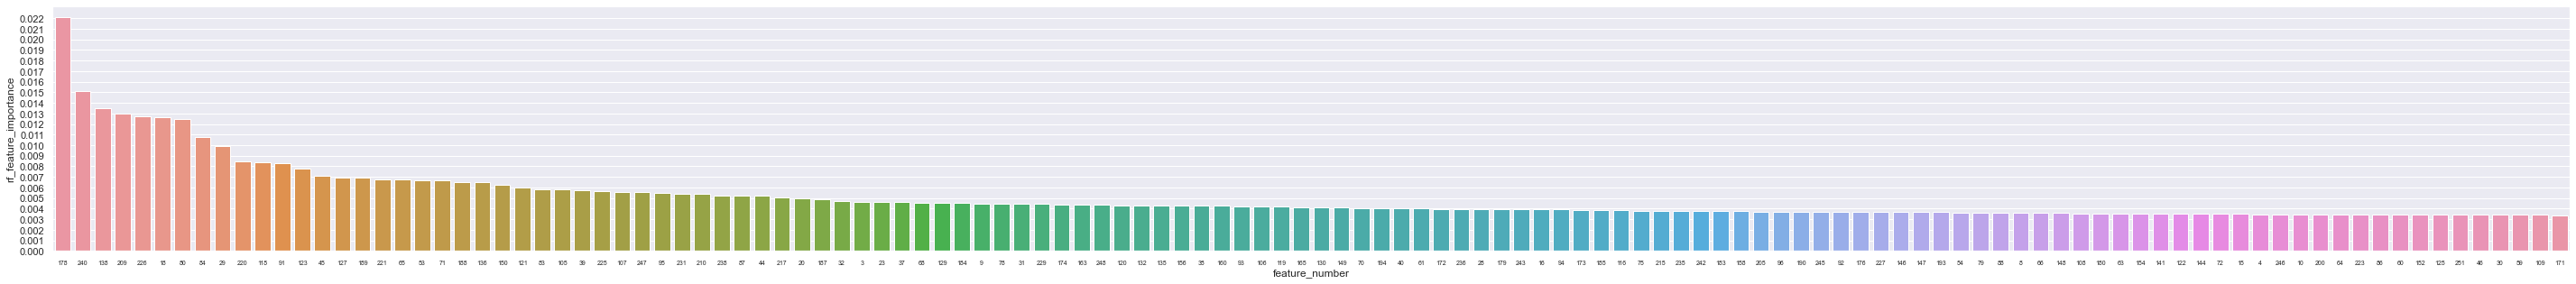

In [22]:
# feature importance over median
sns.barplot(x='feature_number', y='rf_feature_importance', data=fi_rf_ordered[fi_rf_ordered['rf_feature_importance']>0.003390], 
            order = fi_rf_ordered['feature_number'][fi_rf_ordered['rf_feature_importance']>0.003390]) 
plt.rc('xtick', labelsize=10)
plt.yticks(np.arange(0, 0.023, 0.001))
plt.show()

### 3) Feature Selection
- 출처: https://chrisalbon.com/code/machine_learning/trees_and_forests/feature_selection_using_random_forest/     
- https://scikit-learn.org/stable/modules/feature_selection.html     

#### threshold가 feature importances의 Q1일 때

In [23]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(random_forest, threshold=0.002864)
sfm.fit(X_train, Y_train['label'])
for feature_list_index in sfm.get_support(indices=True):
    print(my_list[feature_list_index], end=',')
print("\n\n- important feature 개수:",len(sfm.get_support(indices=True)))

2,3,4,6,7,8,9,10,12,14,15,16,17,18,20,21,23,24,27,28,29,30,31,32,33,37,38,39,40,42,43,44,45,46,47,48,50,51,53,54,55,56,58,59,60,61,63,64,65,66,68,70,71,72,75,76,78,79,80,81,82,83,84,85,86,87,88,91,92,93,94,95,96,97,98,99,101,104,105,106,107,108,109,110,112,114,115,116,118,119,120,121,122,123,124,125,127,129,130,132,133,135,136,138,140,141,143,144,145,146,147,148,149,150,152,154,156,158,159,160,161,162,163,165,166,167,168,171,172,173,174,176,178,179,180,181,183,184,185,187,188,189,190,193,194,195,196,200,203,204,205,208,209,210,211,212,215,216,217,218,220,221,223,225,226,227,228,229,231,232,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,

- important feature 개수: 188


#### threshold가 feature importances의 Median일 때

In [24]:
sfm = SelectFromModel(random_forest, threshold=0.003390)
sfm.fit(X_train, Y_train['label'])
for feature_list_index in sfm.get_support(indices=True):
    print(my_list[feature_list_index], end=',')
print("\n\n- important feature 개수:",len(sfm.get_support(indices=True)))

3,4,8,9,10,15,16,18,20,23,28,29,30,31,32,37,38,39,40,44,45,46,53,54,59,60,61,63,64,65,66,68,70,71,72,75,78,79,80,83,84,86,87,88,91,92,93,94,95,96,105,106,107,108,109,116,118,119,120,121,122,123,125,127,129,130,132,135,136,138,141,144,146,147,148,149,150,152,154,156,158,160,163,165,171,172,173,174,176,178,179,180,183,184,185,187,188,189,190,193,194,200,205,209,210,215,217,220,221,223,225,226,227,229,231,235,236,238,240,242,243,245,246,247,248,251,

- important feature 개수: 126


#### threshold가 feature importances의 Mean일 때

In [25]:
sfm = SelectFromModel(random_forest, threshold=0.003984)
sfm.fit(X_train, Y_train['label'])
for feature_list_index in sfm.get_support(indices=True):
    print(my_list[feature_list_index], end=',')
print("\n\n- important feature 개수:",len(sfm.get_support(indices=True)))

3,9,18,20,23,29,31,32,37,38,39,40,44,45,53,61,65,68,70,71,78,80,83,84,87,91,93,95,105,106,107,118,119,120,121,123,127,129,130,132,135,136,138,149,150,156,160,163,165,172,174,178,184,187,188,189,194,209,210,217,220,221,225,226,229,231,238,240,247,248,

- important feature 개수: 70


#### threshold가 feature importances의 Q3일 때

In [26]:
sfm = SelectFromModel(random_forest, threshold=0.004130)
sfm.fit(X_train, Y_train['label'])
for feature_list_index in sfm.get_support(indices=True):
    print(my_list[feature_list_index], end=',')
print("\n\n- important feature 개수:",len(sfm.get_support(indices=True)))

3,9,18,20,23,29,31,32,37,38,39,44,45,53,65,68,71,78,80,83,84,87,91,93,95,105,106,107,118,119,120,121,123,127,129,132,135,136,138,150,156,160,163,165,174,178,184,187,188,189,209,210,217,220,221,225,226,229,231,238,240,247,248,

- important feature 개수: 63


# Problem 2.
Based on your training results in Problem 1, you now pick your best model that would generalize well to unseen data. Using your best model, we are going to predict on the provided test dataset, OnlineAd X test.csv which contains 300 observations with 251 features. Here we do not have the corresponding responses for these test observations.
## (a). Report the estimated test performance for your best model. Provide a reason for your choice of a model among the models you considered.
- estimated test performance of classification problem: validation set error, which is the fraction of the observations in the validation set that are misclassified. We should compute misclassification error. 
- 출처: https://www.statology.org/k-fold-cross-validation-in-python/
- use the random forest model

In [27]:
scores = cross_val_score(random_forest, X_train, Y_train['label'], scoring='accuracy', cv=kf)
print("classification error of each 10-fold cross validation:", 1-scores)
print("mean misclassification error:", np.mean(1-scores))

score2=cross_val_score(random_forest, X_train, Y_train['label'], cv=kf, scoring='roc_auc_ovr')
print("\nROC_AUC Scores are {}".format(score2))
print("Average ROC_AUC Scores:{}".format(score2.mean()))

classification error of each 10-fold cross validation: [0.36986301 0.4109589  0.32413793 0.33793103 0.35172414 0.35172414
 0.35862069 0.36551724 0.30344828 0.4       ]
mean misclassification error: 0.35739253660840814

ROC_AUC Scores are [0.7236959  0.72264088 0.69991241 0.71436455 0.76037125 0.71598396
 0.71332356 0.646658   0.79338358 0.72087673]
Average ROC_AUC Scores:0.7211210824945018


## (b).Predict on the provided test dataset, OnlineAd_X_test.csv, and save those predictions as a CSV file named [your-student-ID] pred.csv. 
The CSV file should only contain the array of dimension [300, 3] in the same format as the OnlineAd Y train.csv except the number of rows, since there are only 300 observations in the test data, i.e., the first column corresponds to no click, the second column corresponds to the ad A, and the third column corresponds to the ad B.

In [28]:
X_test = pd.read_csv("OnlineAd_X_test.csv", names=my_list)
X_test

,1,2,3,4,5,6,7,8,9,10,...,242,243,244,245,246,247,248,249,250,251
0,-0.0945,-0.0500,-0.4784,-0.5463,-0.7548,-0.8726,-0.3604,0.1178,-0.5160,-0.1509,...,-0.1953,-0.2087,-0.3341,-0.5436,-0.6590,-0.7065,-0.9930,-0.5995,-0.0293,0.0155
1,-0.0378,-0.0272,0.0014,0.0412,0.0229,-0.0204,0.0173,0.0598,0.0036,-0.0193,...,0.0271,0.0052,-0.0057,0.0335,0.0306,-0.0292,-0.0038,0.0400,-0.0470,0.0016
2,-0.2273,-1.0023,-0.0210,-0.4900,-0.7122,0.1001,-0.5883,-0.0102,0.5751,-0.2588,...,0.0853,-0.2240,0.8813,-0.2318,-0.7874,1.1493,0.3548,-0.0908,-1.0499,-0.1982
3,0.1249,-0.9517,-0.5519,0.1714,-0.2293,-1.2437,0.1479,0.4268,-0.6246,-0.3007,...,-1.0818,0.3944,0.3133,-0.0264,-0.5507,-0.3393,0.0063,0.0958,-1.0892,-0.8347
4,0.2822,0.0461,-0.1151,0.0859,0.2989,0.4299,0.1288,0.0961,0.1603,0.1210,...,0.1848,0.2880,-0.0056,0.0940,0.4875,-0.0718,0.3438,0.0996,0.4039,-0.2762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.1528,0.9745,0.4887,1.4177,-0.2539,1.3035,1.2968,0.8093,1.0703,0.9215,...,1.0755,0.7385,1.1890,1.1512,0.4299,0.6109,0.3128,0.2333,1.0729,1.1333
296,-0.6829,-0.0479,0.4371,0.9894,0.4299,0.0228,-0.6047,-0.1406,0.4714,-0.4751,...,-1.6292,0.8981,0.6139,-0.5483,-0.2199,0.2204,-0.0918,0.3461,-0.1899,0.1246
297,0.1310,-0.2290,-1.5164,-0.1678,-0.1344,-0.0220,-1.0616,0.4436,0.7077,-0.2280,...,-2.2268,1.0524,0.8042,0.6268,-0.7420,1.3268,-0.6919,-0.2766,-0.6914,0.3646
298,-0.8874,-0.3810,-0.3506,-0.1915,-0.6438,-1.8236,-0.6086,0.1249,-0.0066,0.2963,...,-0.4358,-0.3682,0.1442,-1.5131,-0.5404,0.7655,0.4735,0.1352,-0.5190,-0.1533


In [29]:
Y_test = random_forest.predict(X_test)
test_list = []
for i in range(len(Y_test)):
    if Y_test[i] == 'no_click':
        test_list.append([1,0,0])
    elif Y_test[i] == 'click_A':
        test_list.append([0,1,0])
    elif Y_test[i] == 'click_B':
        test_list.append([0,0,1])
Y_test = pd.DataFrame(test_list)
Y_test

,0,1,2
0,0,0,1
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
295,1,0,0
296,1,0,0
297,1,0,0
298,1,0,0


In [30]:
print("\t- no_click:\n", Y_test[0].value_counts())
print("\t- click_A:\n", Y_test[1].value_counts())
print("\t- click_B:\n", Y_test[2].value_counts())

	- no_click:
 1    230
0     70
Name: 0, dtype: int64
	- click_A:
 0    281
1     19
Name: 1, dtype: int64
	- click_B:
 0    249
1     51
Name: 2, dtype: int64


In [31]:
Y_test.describe()

,0,1,2
count,300.000000,300.000000,300.00000
mean,0.766667,0.063333,0.17000
std,0.423659,0.243968,0.37626
min,0.000000,0.000000,0.00000
25%,1.000000,0.000000,0.00000
50%,1.000000,0.000000,0.00000
75%,1.000000,0.000000,0.00000
max,1.000000,1.000000,1.00000


In [32]:
Y_test.to_csv("2022-23903_pred.csv", index=False)